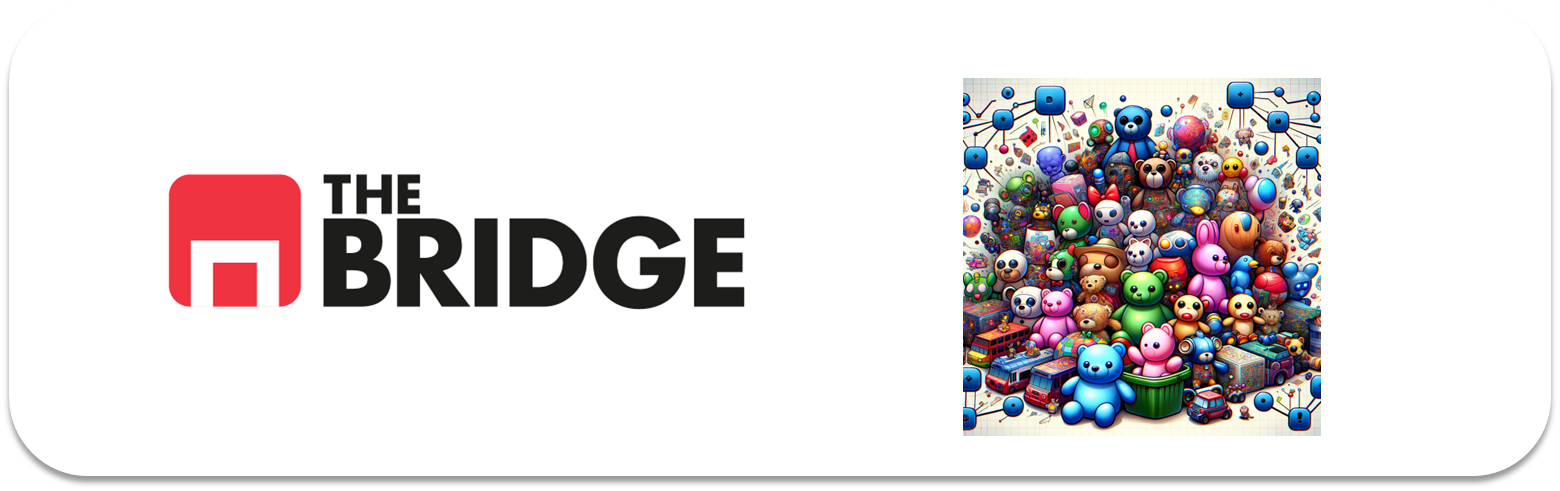

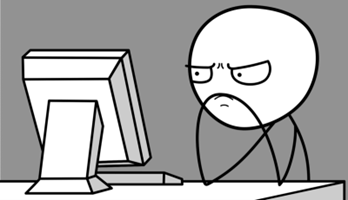

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
# Basis-Pakete
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bildverarbeitung
import cv2  # OpenCV für Bildverarbeitung
from skimage.io import imread, imshow  # Alternative zu OpenCV für das Laden und Anzeigen von Bildern

# K-Means Clustering aus Scikit-Learn
from sklearn.cluster import KMeans

# Sonstige nützliche Funktionen
import os  # Für die Handhabung von Dateipfaden


## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [4]:
# Importieren der notwendigen Bibliotheken
from sklearn.datasets import fetch_olivetti_faces

# Laden des Olivetti Faces Datensatzes
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Anzeigen der Beschreibung des Datensatzes
print(faces['DESCR'])


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\kthfu\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [5]:
import pandas as pd

# Anzeigen der Zielwerte (Labels)
print("Target-Werte:\n", faces.target)

# Erstellen eines DataFrames mit den Bilddaten (flattened) und den Labels
df_faces = pd.DataFrame(faces.data)  # Die Bilddaten (4096 Features pro Bild)
df_faces['target'] = faces.target    # Die Zielwerte hinzufügen

# Zufälliges Mischen des DataFrames
df_faces_shuffled = df_faces.sample(frac=1, random_state=42).reset_index(drop=True)

# Anzeige der ersten 5 Zeilen des gemischten DataFrames
df_faces_shuffled.head()


Target-Werte:
 [20 28  3 21  9  8 32  9 26 12  0 36  5  7 13  4 27 37 23 38  7  1 39 27
  0 39 11 22 26 10 39 19 26  5 23 11 11 34 15 14 38  5  7  2  8 38 14 18
  2 17  4 32 33  7 37  3 22 17  3 15 12 29 25  7 10  3 35 26 39  7 32 14
  0  4 38 24 22 36 17 28  0  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31
 37 38 23  7 24 11  1  6 15  0  1 13 35 34 13 38 29 38 29  6  7 28 30 28
 15 10  1 34  2 17 35 33 16 24 31 14 25 17 11 19 22 26 21 30  3 13 29 15
 19 28  5 11 16 36  0 33 27 15  1 19 10  8 31 39 37 20 28 16 35  8 37 16
 14 22  9  6 12  9 14 32  9 23  6  2  3 14 12 18  6 19 32 21 31 19 12 14
 37  8 33 34 33 35 33 30 18 20 28 21 28 12  3  1 32 18 22 11 17 32 29 11
 36 27 38 28 36 16 25 13 15 19 19 39  0 20 11 23 23  2 12 35 22 36 37 35
 37 12  7 32  2  8 38 10 24 29 13 24 18 29  4 36  6  8 24 18 15  1  3  2
 17 14 31 27 22  9  5 24 29 30 17  4 31 20 25 33  0 25 35 10 22 34 21 17
  9 21  6  4  3 26 20 35  2 31 23 26 28 16 37 13  6 13 12  0  6 30  1 15
  4 36 32 21 27 34 23 20 21 29 36 25

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.252066,0.231405,0.276859,0.417355,0.433884,0.669421,0.834711,0.859504,0.871901,0.871901,...,0.508264,0.268595,0.140496,0.165289,0.169421,0.173554,0.181818,0.173554,0.177686,18
1,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
2,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207,5
3,0.652893,0.690083,0.677686,0.690083,0.714876,0.743802,0.747934,0.735537,0.710744,0.681818,...,0.152893,0.140496,0.086777,0.111570,0.173554,0.243802,0.223140,0.260331,0.309917,22
4,0.409091,0.590909,0.657025,0.681818,0.694215,0.731405,0.760331,0.785124,0.776860,0.785124,...,0.276859,0.314050,0.268595,0.247934,0.256198,0.264463,0.252066,0.276859,0.285124,22


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [6]:
from sklearn.model_selection import train_test_split

# Erster Split: 80% Training, 20% Test+Validierung (stratifiziert nach 'target')
X_train, X_temp, y_train, y_temp = train_test_split(
    df_faces_shuffled.drop(columns=['target']),  # Merkmale
    df_faces_shuffled['target'],                 # Zielwerte
    test_size=0.2, 
    stratify=df_faces_shuffled['target'], 
    random_state=42
)

# Zweiter Split: 10% Validierung, 10% Test (aus den verbleibenden 20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    stratify=y_temp, 
    random_state=42
)

# Ausgabe der Datengrößen zur Kontrolle
print(f"Trainingsdaten: {X_train.shape}, Targets: {y_train.shape}")
print(f"Validierungsdaten: {X_val.shape}, Targets: {y_val.shape}")
print(f"Testdaten: {X_test.shape}, Targets: {y_test.shape}")


Trainingsdaten: (320, 4096), Targets: (320,)
Validierungsdaten: (40, 4096), Targets: (40,)
Testdaten: (40, 4096), Targets: (40,)


In [7]:
import numpy as np

# Prüfen, ob die Targets gleichmäßig verteilt sind
print("Trainings-Set Verteilung:", np.bincount(y_train))
print("Validierungs-Set Verteilung:", np.bincount(y_val))
print("Test-Set Verteilung:", np.bincount(y_test))


Trainings-Set Verteilung: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8]
Validierungs-Set Verteilung: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Test-Set Verteilung: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


### #1.4

Crea los pares X,y para train, validation y test.

In [8]:
# Erstellung der (X, y)-Paare für Training, Validierung und Test
train_set = (X_train, y_train)
val_set = (X_val, y_val)
test_set = (X_test, y_test)

# Überprüfung der Shapes
print(f"Trainings-Set: X={train_set[0].shape}, y={train_set[1].shape}")
print(f"Validierungs-Set: X={val_set[0].shape}, y={val_set[1].shape}")
print(f"Test-Set: X={test_set[0].shape}, y={test_set[1].shape}")


Trainings-Set: X=(320, 4096), y=(320,)
Validierungs-Set: X=(40, 4096), y=(40,)
Test-Set: X=(40, 4096), y=(40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

In [9]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)  # Umwandlung in 64x64-Bilder
    n_rows = (len(faces) // n_cols) + 1  # Berechnung der benötigten Zeilen

    plt.figure(figsize=(n_cols * 2, n_rows * 2))  # Anpassung der Bildgröße

    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")  # Graustufen-Darstellung
        plt.axis("off")  
        plt.title(f"Person {label}")

    plt.show()


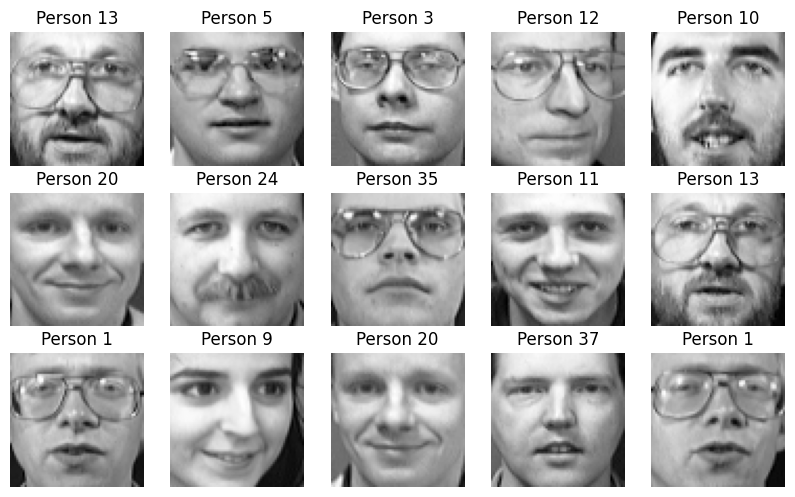

In [10]:
plot_faces(X_train.iloc[:15].values, y_train.iloc[:15], n_cols=5)


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisierung der Daten für PCA (PCA funktioniert besser mit standardisierten Daten)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA mit 99% der Varianz
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Anzahl der Hauptkomponenten anzeigen
print(f"Anzahl der Hauptkomponenten: {pca.n_components_}")


Anzahl der Hauptkomponenten: 220


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

Optimales k: 120 mit Silhouetten-Score: 0.2322


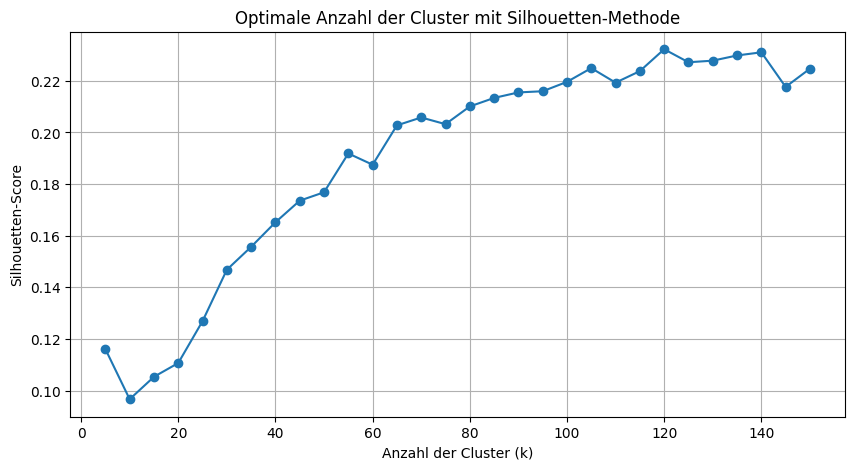

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Werte für k von 5 bis 150 in 5er-Schritten
k_values = range(5, 151, 5)
silhouette_scores = []

# Iteriere über verschiedene k-Werte und berechne den Silhouetten-Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)  # Cluster-Zuweisung für Trainingsdaten
    score = silhouette_score(X_train_pca, labels)  # Silhouetten-Score berechnen
    silhouette_scores.append(score)

# Bestes k bestimmen (höchster Silhouetten-Score)
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"Optimales k: {best_k} mit Silhouetten-Score: {best_score:.4f}")

# 📊 Visualisierung des Silhouetten-Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Silhouetten-Score")
plt.title("Optimale Anzahl der Cluster mit Silhouetten-Methode")
plt.grid(True)
plt.show()



### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

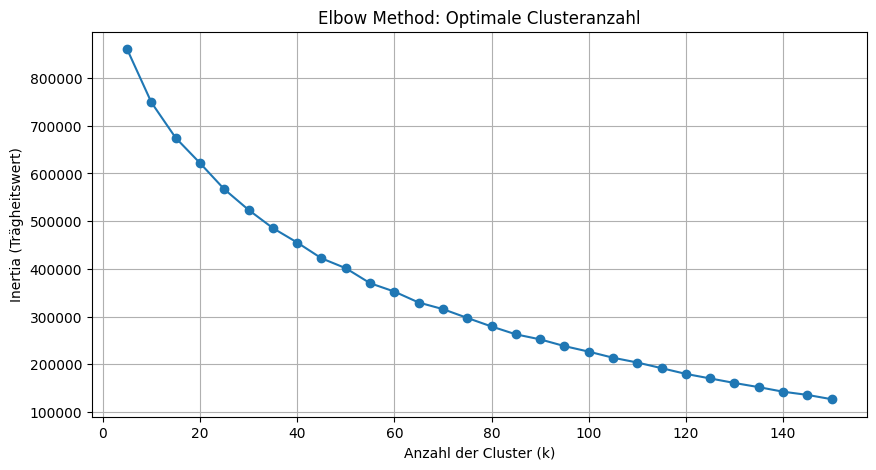

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Werte für k von 5 bis 150 in 5er-Schritten
k_values = range(5, 151, 5)
inertia_scores = []

# K-Means für verschiedene k-Werte berechnen und die Inertia (Trägheit) speichern
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)  
    inertia_scores.append(kmeans.inertia_)  # Trägheitswert speichern

# 📊 Elbow-Plot für die Inertia-Methode
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Trägheitswert)")
plt.title("Elbow Method: Optimale Clusteranzahl")
plt.grid(True)
plt.show()


#  Interpretación de los Resultados de Clustering

## **1️ Silhouette Score**
El primer gráfico muestra la evolución del **Silhouette Score** en función del número de clusters (**k**).  
- El **máximo valor** del Silhouette Score se encuentra en **k = 120**, con un valor de **0.2322**.
- El Silhouette Score aumenta constantemente hasta este punto, lo que sugiere que **k = 120** es el número óptimo de clusters en términos de cohesión y separación de los grupos.
- Después de k = 120, el score se mantiene estable o disminuye ligeramente, lo que indica que añadir más clusters **no mejora significativamente la calidad del agrupamiento**.

### **Conclusión del Silhouette Score**
 **k = 120** parece ser la mejor opción según este método, ya que proporciona la mejor estructura de clusters en términos de similitud interna.

---

## **2️ Elbow Method (Método del Codo)**
El segundo gráfico representa la **Inercia (Trägheitswert)** en función del número de clusters.  
- La inercia disminuye a medida que **k** aumenta, lo que significa que los clusters son cada vez más compactos.
- Sin embargo, el punto donde la **tasa de disminución se ralentiza** (el "codo") no es tan claro.
- Se observa un cambio más notable en la curva alrededor de **k ≈ 40-60**, lo que sugiere que podría ser una opción razonable en términos de balance entre reducción de error y número de clusters.

### **Conclusión del Elbow Method**
 El punto de codo **no es muy pronunciado**, pero parece ubicarse en **k ≈ 40-60**, lo que podría indicar un número de clusters más pequeño que el sugerido por el Silhouette Score.

---

## ** Comparación de Resultados**
🔹 **Silhouette Score** sugiere que el número óptimo de clusters es **k = 120**.  
🔹 **Elbow Method** sugiere un valor menor, aproximadamente **k ≈ 40-60**.  

 **Recomendación Final**:
- Si el objetivo es una **buena separación de los grupos**, **k = 120** es la mejor opción según el Silhouette Score.
- Si queremos un número de clusters **más manejable y compacto**, podríamos optar por **k = 40-60** basándonos en el Elbow Method.
- Una posible estrategia sería probar **ambas opciones** y evaluar los resultados con otros métodos de validación.

 **La decisión final dependerá del contexto y del uso práctico de los clusters en este conjunto de datos.**


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [14]:
from sklearn.cluster import KMeans

# Definiere das finale K-Means-Modell mit k = 120
best_k = 120  # Aus dem Silhouetten-Score-Ergebnis
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Trainiere das Modell mit den PCA-reduzierten Daten
best_model.fit(X_train_pca)

# Ausgabe der Clusterzentren und Labels zur Überprüfung
print(f"Cluster-Zentren Shape: {best_model.cluster_centers_.shape}")
print(f"Labels Shape: {best_model.labels_.shape}")


Cluster-Zentren Shape: (120, 220)
Labels Shape: (320,)


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

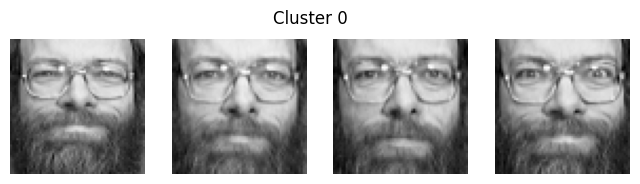

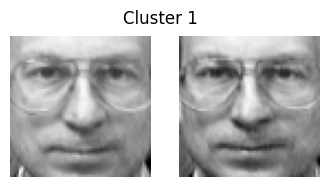

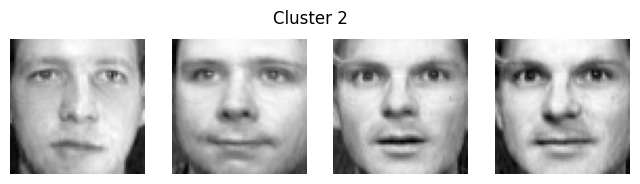

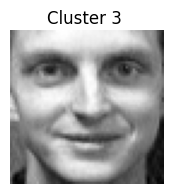

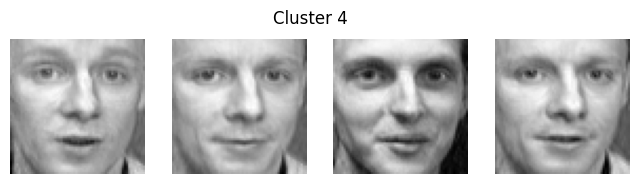

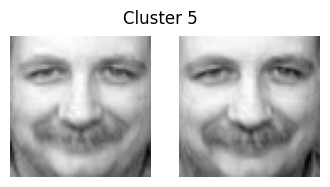

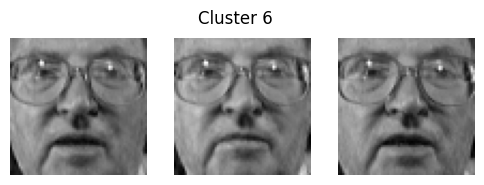

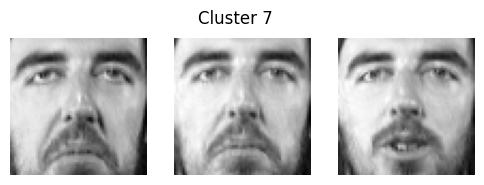

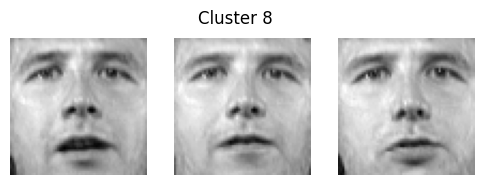

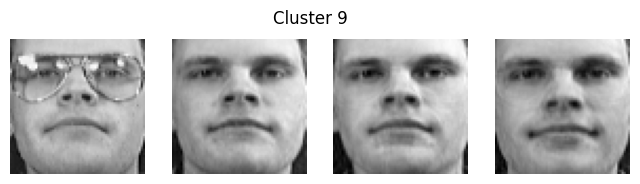

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion zur Visualisierung von Gesichtern in Clustern
def plot_cluster_faces(model, X_pca, original_faces, cluster_num, n_samples=10):
    """Zeigt bis zu `n_samples` Gesichter aus dem Cluster `cluster_num`"""
    cluster_labels = model.labels_
    cluster_indices = np.where(cluster_labels == cluster_num)[0]  # Indizes der Bilder im Cluster

    # Falls zu wenige Bilder im Cluster sind, anpassen
    n_samples = min(len(cluster_indices), n_samples)

    if n_samples == 0:
        print(f"⚠ Keine Bilder für Cluster {cluster_num} gefunden.")
        return
    
    # Subplots erzeugen
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 2, 2))

    # Falls nur ein Bild, `axes` in eine Liste packen
    if n_samples == 1:
        axes = [axes]

    for i, idx in enumerate(cluster_indices[:n_samples]):
        axes[i].imshow(original_faces[idx].reshape(64, 64), cmap="gray")
        axes[i].axis("off")

    plt.suptitle(f"Cluster {cluster_num}")
    plt.show()

# Originalbilder zurückskalieren (Da X_train_pca transformierte Features enthält)
X_train_reconstructed = scaler.inverse_transform(pca.inverse_transform(X_train_pca))

# Zeige Gesichter aus den ersten 10 Clustern
for cluster in range(10):
    plot_cluster_faces(best_model, X_train_pca, X_train_reconstructed, cluster_num=cluster, n_samples=10)



#  Evaluación del Clustering

## ** Análisis de los Resultados**
El clustering con **K-Means (k=120)** ha dado resultados **muy coherentes**. Observamos que:
- **Cada cluster contiene imágenes de la misma persona**.
- Existen **variaciones en la expresión facial y la iluminación**, pero los rostros siguen siendo de la misma identidad.
- El modelo ha logrado **agrupar correctamente las imágenes en función de las características faciales**.

## ** Puntos Fuertes**
 **Separación efectiva**: Las imágenes dentro de cada cluster son de la misma persona, lo que indica que K-Means ha encontrado patrones sólidos en los datos.  
 **No hay clusters con múltiples identidades**, lo que sugiere que el número de clusters elegido (`k=120`) es adecuado.  
 **A pesar de la reducción de dimensionalidad (PCA), la información relevante se ha mantenido**, permitiendo un buen agrupamiento.



## ** Conclusión**
 El clustering ha sido **muy exitoso**, ya que ha logrado identificar correctamente **las personas en los datos**.  
 Para mejorar el modelo, podríamos **ajustar el número de clusters o probar otros métodos de clustering**.  




## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️ Random Forest Modell definieren
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# 2️ Modell mit Trainingsdaten trainieren
rf_model.fit(X_train_pca, y_train)

# 3️ Vorhersage auf dem Validierungsset
y_pred = rf_model.predict(X_val_pca)

# 4️ Modellbewertung
accuracy = accuracy_score(y_val, y_pred)
print(f" Genauigkeit des Modells auf dem Validierungsset: {accuracy:.4f}")

# 5️ Detaillierter Bericht der Klassifikation
print("\n Klassifikationsbericht:\n", classification_report(y_val, y_pred))


 Genauigkeit des Modells auf dem Validierungsset: 0.9750

 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00        

c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️ Transformation der Features durch K-Means
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

# 2️ Neuen Random Forest Klassifikator mit reduzierten Features trainieren
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# 3️ Vorhersage auf dem Validierungsset
y_pred_reduced = rf_model_reduced.predict(X_val_reduced)

# 4️ Modellbewertung
accuracy_reduced = accuracy_score(y_val, y_pred_reduced)
print(f" Genauigkeit mit reduzierten Features: {accuracy_reduced:.4f}")

# 5️ Detaillierter Bericht der Klassifikation
print("\n Klassifikationsbericht:\n", classification_report(y_val, y_pred_reduced))


 Genauigkeit mit reduzierten Features: 0.8250

 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
        

c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

 k=20 → Accuracy: 0.7000
 k=40 → Accuracy: 0.7250
 k=60 → Accuracy: 0.7750
 k=80 → Accuracy: 0.8250
 k=100 → Accuracy: 0.8750
 k=120 → Accuracy: 0.8250
 k=140 → Accuracy: 0.8500
 k=160 → Accuracy: 0.9000
 k=180 → Accuracy: 0.9000
 k=200 → Accuracy: 0.8750


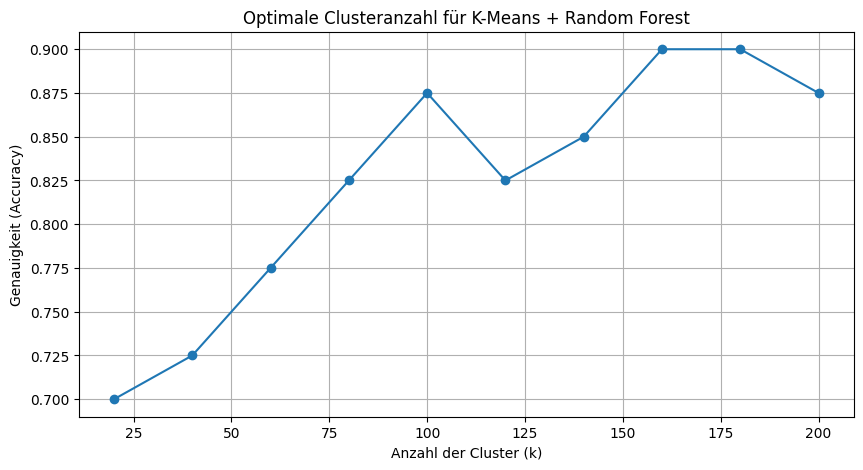


 Bestes k: 160 mit Accuracy: 0.9000


In [20]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Werte für k testen (von 20 bis 200 in 20er-Schritten)
k_values = range(20, 201, 20)
accuracy_scores = []

for k in k_values:
    # 1️ K-Means mit k Clustern trainieren
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)

    # 2️ Transformation der Features durch K-Means (Distanzen zu den Cluster-Zentren)
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_val_pca)

    # 3️ Random Forest trainieren
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train_reduced, y_train)

    # 4️ Modellbewertung auf dem Validierungsset
    y_pred = rf_model.predict(X_val_reduced)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    print(f" k={k} → Accuracy: {accuracy:.4f}")

#  Plot der Accuracy in Abhängigkeit von k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Genauigkeit (Accuracy)")
plt.title("Optimale Clusteranzahl für K-Means + Random Forest")
plt.grid(True)
plt.show()

# Bestes k finden
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"\n Bestes k: {best_k} mit Accuracy: {best_accuracy:.4f}")
